In [4]:
# Import libraries 
# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Maths
import math

# Set pandas options to show more rows and columns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [5]:
# Read data in form of a csv file
df = pd.read_csv("sfr_test (1).csv")


# First 5 rows of the dataset
df.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,"$2,721.85","$3,611.21",$2.02,$632.13,$82.13,$474.83,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,"$5,060.21","$6,817.97",$5.24,"$2,535.98",$205.93,$457.04,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,"$3,159.82","$3,443.32",$3.17,$595.96,$59.13,$482.63,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,False,False,"$9,563.23","$11,015.31",$9.92,$181.95,$265.65,$469.04,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,"$17,456.26","$17,590.58",$25.55,$810.83,$210.62,$527.98,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55


In [6]:
df['ipa_funding']

0         $2,721.85
1         $5,060.21
2         $3,159.82
3         $9,563.23
4        $17,456.26
            ...    
10525     $4,526.14
10526     $9,482.67
10527    $17,184.32
10528     $9,483.41
10529     $4,955.15
Name: ipa_funding, Length: 10530, dtype: object

In [7]:
#clean the colum and convert the string type column into float type
def clean_and_convert_to_float(df, column_name):
    # Remove $ and , from the specified column
    df[column_name] = df[column_name].str.replace('$', '').str.replace(',', '')
    
    # Convert the cleaned column from string to float
    df[column_name] = df[column_name].astype(float)
    
    return df


In [8]:
clean_and_convert_to_float(df, 'ipa_funding')

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,2721.85,"$3,611.21",$2.02,$632.13,$82.13,$474.83,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,5060.21,"$6,817.97",$5.24,"$2,535.98",$205.93,$457.04,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,3159.82,"$3,443.32",$3.17,$595.96,$59.13,$482.63,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,False,False,9563.23,"$11,015.31",$9.92,$181.95,$265.65,$469.04,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,17456.26,"$17,590.58",$25.55,$810.83,$210.62,$527.98,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,10526,F,07/04/1954,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,False,False,4526.14,"$5,397.12",$4.53,$634.53,$198.45,$715.02,$0.00,"$5,097.30",$0.00,$8.94,$0.00,$317.71,$0.00,$292.58,$279.22,$989.74
10526,10527,F,08/12/1945,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,False,False,9482.67,"$10,766.42",$13.85,$230.99,$402.95,$725.39,$0.00,"$11,278.18",$0.00,$8.93,$0.00,$238.86,$0.00,$234.95,$248.51,"$1,002.72"
10527,10528,M,08/06/1950,2020,202006,SaludVIP,NON-SNP,MEDICARE - CAREFREE,93,HMO,False,False,17184.32,"$20,633.83",$28.16,$115.47,$255.70,$758.40,$0.00,"$21,917.27",$0.00,$9.04,$0.00,$0.00,$0.00,$0.00,$0.00,$840.19
10528,10529,M,12/10/1949,2020,202006,SaludVIP,NON-SNP,MEDICARE - CAREFREE,93,HMO,False,False,9483.41,"$12,054.95",$16.80,$330.22,$174.11,$673.08,$0.00,"$11,212.60",$364.93,$8.96,$0.00,$529.86,$0.00,$638.28,$641.81,$868.84


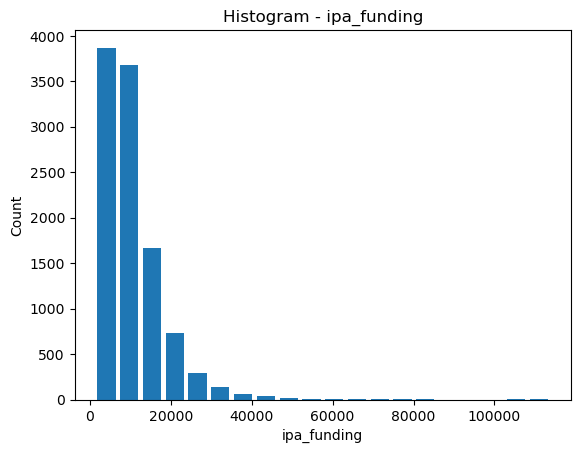

In [9]:
plt.hist(df.ipa_funding, bins=20, rwidth=0.8)
plt.xlabel('ipa_funding')
plt.ylabel('Count')
plt.title('Histogram - ipa_funding')
plt.show()

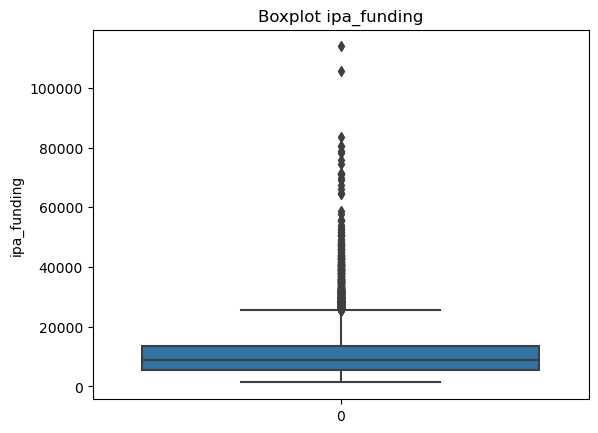

In [10]:
# Create a boxplot 
sns.boxplot(df['ipa_funding'])

# Add labels and title
plt.ylabel('ipa_funding')
plt.title('Boxplot ipa_funding')

# Show the plot
plt.show()

In [11]:
np.nanstd(df.ipa_funding.values.tolist())

7689.826529078626

In [12]:
np.nanmean(df.ipa_funding.values)

10657.849594491929

In [13]:
np.isinf(df[['ipa_funding']]).values.sum()

0

In [15]:
# Compute Z Score
ipafunding_mean = np.nanmean(df.ipa_funding.values.tolist())
ipafunding_std = np.nanstd(df.ipa_funding.values.tolist())

print("Mean Credit Score is: ", ipafunding_mean)
print("Std Credit Score is: ", ipafunding_std)

Mean Credit Score is:  10657.849594491929
Std Credit Score is:  7689.826529078626


In [16]:
df['zscore_ipa_funding'] = (df.ipa_funding- ipafunding_mean ) / ipafunding_std
df[["member_unique_id", "ipa_funding", "zscore_ipa_funding"]].head()

,member_unique_id,ipa_funding,zscore_ipa_funding
0,1,2721.85,-1.032013
1,2,5060.21,-0.727928
2,3,3159.82,-0.975058
3,4,9563.23,-0.142346
4,5,17456.26,0.884079


In [28]:
# Define thresholds for Z-score (e.g., 3 and -3)
threshold_pos = 3
threshold_neg = -3

# Count the number of outliers above the positive threshold
outliers_count_pos = len(df[df['zscore_ipa_funding'] > threshold_pos])

# Count the number of outliers below the negative threshold
outliers_count_neg = len(df[df['zscore_ipa_funding'] < threshold_neg])

# Total number of outliers
total_outliers_count = outliers_count_pos + outliers_count_neg

# Print the count of outliers
print("Number of outliers (above threshold):", outliers_count_pos)
print("Number of outliers (below threshold):", outliers_count_neg)
print("Total number of outliers:", total_outliers_count)

Number of outliers (above threshold): 169
Number of outliers (below threshold): 0
Total number of outliers: 169


In [18]:
# for ma_premium column 
df['ma_premium']

0         $3,611.21
1         $6,817.97
2         $3,443.32
3        $11,015.31
4        $17,590.58
            ...    
10525     $5,397.12
10526    $10,766.42
10527    $20,633.83
10528    $12,054.95
10529     $6,666.63
Name: ma_premium, Length: 10530, dtype: object

In [19]:
clean_and_convert_to_float(df, 'ma_premium')

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,esrd,hospice,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap,zscore_ipa_funding
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,2721.85,3611.21,$2.02,$632.13,$82.13,$474.83,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78,-1.032013
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,5060.21,6817.97,$5.24,"$2,535.98",$205.93,$457.04,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77,-0.727928
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,False,False,3159.82,3443.32,$3.17,$595.96,$59.13,$482.63,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84,-0.975058
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,False,False,9563.23,11015.31,$9.92,$181.95,$265.65,$469.04,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26,-0.142346
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,False,False,17456.26,17590.58,$25.55,$810.83,$210.62,$527.98,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55,0.884079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,10526,F,07/04/1954,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,False,False,4526.14,5397.12,$4.53,$634.53,$198.45,$715.02,$0.00,"$5,097.30",$0.00,$8.94,$0.00,$317.71,$0.00,$292.58,$279.22,$989.74,-0.797379
10526,10527,F,08/12/1945,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,False,False,9482.67,10766.42,$13.85,$230.99,$402.95,$725.39,$0.00,"$11,278.18",$0.00,$8.93,$0.00,$238.86,$0.00,$234.95,$248.51,"$1,002.72",-0.152823
10527,10528,M,08/06/1950,2020,202006,SaludVIP,NON-SNP,MEDICARE - CAREFREE,93,HMO,False,False,17184.32,20633.83,$28.16,$115.47,$255.70,$758.40,$0.00,"$21,917.27",$0.00,$9.04,$0.00,$0.00,$0.00,$0.00,$0.00,$840.19,0.848715
10528,10529,M,12/10/1949,2020,202006,SaludVIP,NON-SNP,MEDICARE - CAREFREE,93,HMO,False,False,9483.41,12054.95,$16.80,$330.22,$174.11,$673.08,$0.00,"$11,212.60",$364.93,$8.96,$0.00,$529.86,$0.00,$638.28,$641.81,$868.84,-0.152726


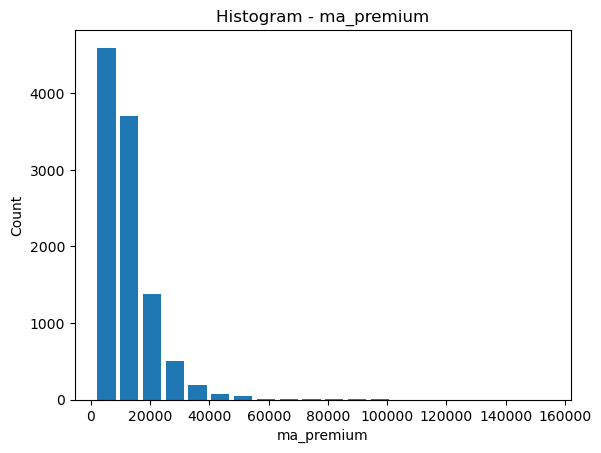

In [20]:
plt.hist(df.ma_premium, bins=20, rwidth=0.8)
plt.xlabel('ma_premium')
plt.ylabel('Count')
plt.title('Histogram - ma_premium')
plt.show()

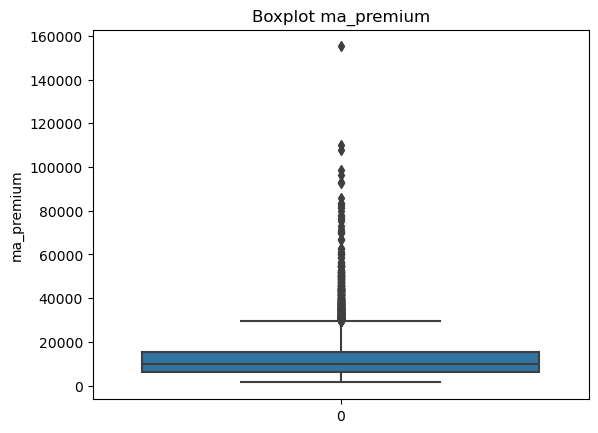

In [21]:
# Create a boxplot 
sns.boxplot(df['ma_premium'])

# Add labels and title
plt.ylabel('ma_premium')
plt.title('Boxplot ma_premium')

# Show the plot
plt.show()

In [22]:
np.nanstd(df.ma_premium.values.tolist())

8955.15382431829

In [23]:
np.nanmean(df.ma_premium.values)


12311.727550807218

In [24]:
np.isinf(df[['ma_premium']]).values.sum()

0

In [25]:
# Compute Z Score
mapremium_mean = np.nanmean(df.ma_premium.values.tolist())
mapremium_std = np.nanstd(df.ma_premium.values.tolist())

print("Mean Credit Score is: ", mapremium_mean)
print("Std Credit Score is: ", mapremium_std)


Mean Credit Score is:  12311.727550807218
Std Credit Score is:  8955.15382431829


In [26]:
df['zscore_ma_premium'] = (df.ma_premium- ipafunding_mean ) / ipafunding_std
df[["member_unique_id", "ma_premium", "zscore_ipa_funding"]].head()

,member_unique_id,ma_premium,zscore_ipa_funding
0,1,3611.21,-1.032013
1,2,6817.97,-0.727928
2,3,3443.32,-0.975058
3,4,11015.31,-0.142346
4,5,17590.58,0.884079


In [31]:
# Define thresholds for Z-score (e.g., 3 and -3)
threshold_pos = 3
threshold_neg = -3

# Count the number of outliers above the positive threshold
outliers_count_pos = len(df[df['zscore_ma_premium'] > threshold_pos])

# Count the number of outliers below the negative threshold
outliers_count_neg = len(df[df['zscore_ma_premium'] < threshold_neg])

# Total number of outliers
total_outliers_count = outliers_count_pos + outliers_count_neg

# Print the count of outliers
print("Number of outliers (above threshold):", outliers_count_pos)
print("Number of outliers (below threshold):", outliers_count_neg)
print("Total number of outliers:", total_outliers_count)

Number of outliers (above threshold): 291
Number of outliers (below threshold): 0
Total number of outliers: 291


In [36]:
# List of columns for outlier analysis
columns_of_interest = [ "ma_risk_score", "mbr_with_rx_rebates", "partd_premium", "pcp_cap", "pcp_ffs", "plan_premium", "prof", "reinsurance", "risk_score_partd", "rx", "rx_rebates", "rx_with_rebates", "rx_without_rebates", "spec_cap" ]  # Add additional columns as needed
# Define a threshold for Z-score analysis
threshold = 3
# Perform Z-score analysis for each column in the list
for column_name in columns_of_interest:
    # Check if the column contains numeric data
    if df[column_name].dtype != 'float64':
        # Clean and convert the column to float type
        df = clean_and_convert_to_float(df, column_name)
    
    # Compute mean and standard deviation
    column_mean = np.nanmean(df[column_name].values.tolist())
    column_std = np.nanstd(df[column_name].values.tolist())
    
    # Calculate Z-scores
    df['zscore_' + column_name] = (df[column_name] - column_mean) / column_std
    
    # Count outliers
    outliers_count = len(df[df['zscore_' + column_name].abs() > threshold])
    
    # Print the count of outliers for each column
    print("Number of outliers in", column_name, ":", outliers_count)

Number of outliers in ma_risk_score : 187
Number of outliers in mbr_with_rx_rebates : 95
Number of outliers in partd_premium : 191
Number of outliers in pcp_cap : 0
Number of outliers in pcp_ffs : 200
Number of outliers in plan_premium : 178
Number of outliers in prof : 156
Number of outliers in reinsurance : 0
Number of outliers in risk_score_partd : 0
Number of outliers in rx : 85
Number of outliers in rx_rebates : 0
Number of outliers in rx_with_rebates : 87
Number of outliers in rx_without_rebates : 84
Number of outliers in spec_cap : 36
